# Exploratory Data Analysis of UFJF Network Dataset

An Exploratory Data Analysis (EDA) is an approach to understand the main characteristics of a dataset, often with visual methods. It is a best practice for seeing what data can tell us beyond the formal modeling or hypothesis testing task. Indeed, companies make business decision through it because, if done well, EDA may improve the efficacy of the analysis.

EDA in Python uses data visualization to draw patterns and insights. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python, while seaborn provides a high-level interface for drawing attractive and informative statistical graphics. Python also supports the data analysis through stabile packages, such as pandas, a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. The EDA was been carried on through a Jupyter Notebook with a virtualenv kernel Python 3.8.5 64-bit.

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# change to set your favorite figure size
sns.set(rc={'figure.figsize':(20,5)})

## Data Sourcing
Firts of all, we have to describe the available dataset, including its features.
The dataset is copyrighted by the Universidade Federal de Juiz de Fora (Juiz de Fora, Brazil), where data were collected and formatted in CSV.

In [96]:
dataset_path = 'ufjf_dataset.csv'
df = pd.read_csv(dataset_path)

In [97]:
print('The dataset shape is: %d x %d' % (df.shape))
columns_len = len(df.columns)
columns_name = list(df.columns)
print('There are %s columns: %s' % (columns_len, columns_name))

The dataset shape is: 14295222 x 4
There are 4 columns: ['time1', 'timet', 'client_id', 'radio_id']


In [98]:
print('Data are in the following format.')
df.head(5)

Data are in the following format.


time1  timet  client_id                     radio_id
0  2019-05-31 08:48:52   13.0          7              economia-4andar
1  2019-05-31 08:48:52   31.0         20            ru_nutricionistas
2  2019-05-31 08:48:53   38.0         29                ap4600-67aef4
3  2019-05-31 08:48:53   17.0         12  reitoria-centralatendimento
4  2019-05-31 08:48:54   10.0          5             ccs-2andarfundos

The meaning of the features is explained as follow:
- **time1** represents the timestamp acquired when a connection starts at the specific access point;
- **timet** represents the connection time;
- **client_id** represents the connected host;
- **radio_id** represents the access point.

According to that explaination, we are going to modify the feature labels as follow:
- time1 --> timestamp
- timet --> connection_time
- client_id --> host
- radio_id --> access_point

In [99]:
df.rename(columns={'time1': 'timestamp', 'timet': 'connection_time', 'client_id': 'host', 'radio_id': 'access_point'}, inplace=True)
df.head(5)

timestamp  connection_time  host                 access_point
0  2019-05-31 08:48:52             13.0     7              economia-4andar
1  2019-05-31 08:48:52             31.0    20            ru_nutricionistas
2  2019-05-31 08:48:53             38.0    29                ap4600-67aef4
3  2019-05-31 08:48:53             17.0    12  reitoria-centralatendimento
4  2019-05-31 08:48:54             10.0     5             ccs-2andarfundos

## Univariate analysis

In [100]:
df.isnull().sum()

timestamp          0
connection_time    0
host               0
access_point       0
dtype: int64

The dataset does not have missing values.

In [101]:
timestamp_sorted = df.sort_values('timestamp')
timestamp_min = timestamp_sorted.iloc[0]['timestamp']
timestamp_max = timestamp_sorted.iloc[-1]['timestamp']
print('The dataset was collected between %s and %s' % (timestamp_min, timestamp_max))

The dataset was collected between 2019-05-31 08:48:52 and 2019-09-30 06:35:30


In [102]:
print('The connection_time is in the range [%s, %s]' % (df.connection_time.min(), df.connection_time.max()))
threshold = 30
print('The occurrences of connection_time less than %ss are %s' % (threshold, df[df.connection_time < threshold].connection_time.count()))
print('The occurrences of connection_time grather than %ss are %s' % (threshold, df[df.connection_time >= threshold].connection_time.count()))

The connection_time is in the range [0.0, 8906006.0]
The occurrences of connection_time less than 30s are 7250881
The occurrences of connection_time grather than 30s are 7044341


The connection time occurrences less than a specific threshold could be dropped because meaningless. Likely, a low value represents a walk through a corridor, for moving from a room to another room.
We are going to clean the dataset, but first let's continue with the univariate analysis.

In [103]:
df.drop(df.loc[df['connection_time'] < threshold].index, inplace=True)
print('The new dataset shape is: %d x %d' % (df.shape))

The new dataset shape is: 7044341 x 4


There are 33340 unique hosts


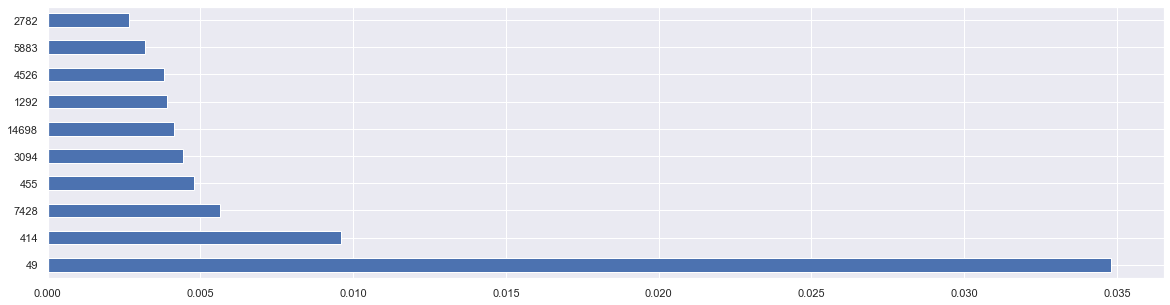

In [104]:
hosts = df['host'].value_counts(normalize=True)
print('There are %s unique hosts' % (len(hosts)))
top = 10
hosts[:top].plot.barh()
del(hosts)

There are 108 unique access points


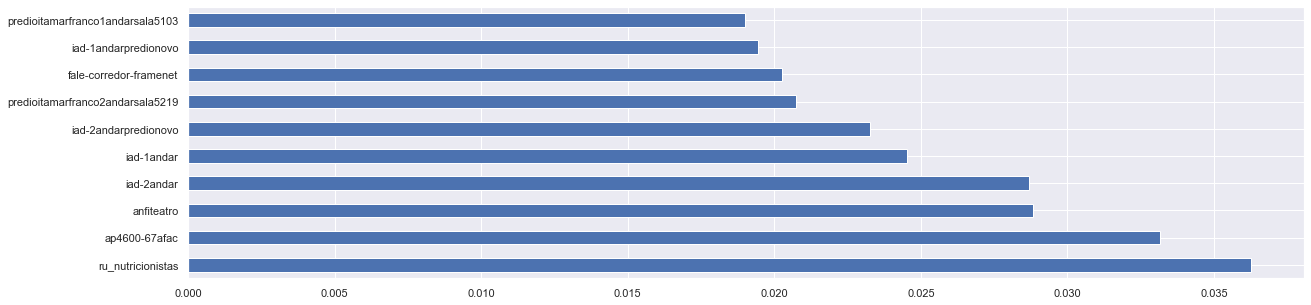

In [105]:
access_points = df.access_point.value_counts(normalize=True)
print('There are %s unique access points' % (len(access_points)))
top = 10
access_points[:top].plot.barh()
del(access_points)

## Multivariate Analysis

In [106]:
df.timestamp =  pd.to_datetime(df.timestamp, format='%Y/%m/%d %H:%M:%S')
df.dtypes

timestamp          datetime64[ns]
connection_time           float64
host                        int64
access_point               object
dtype: object

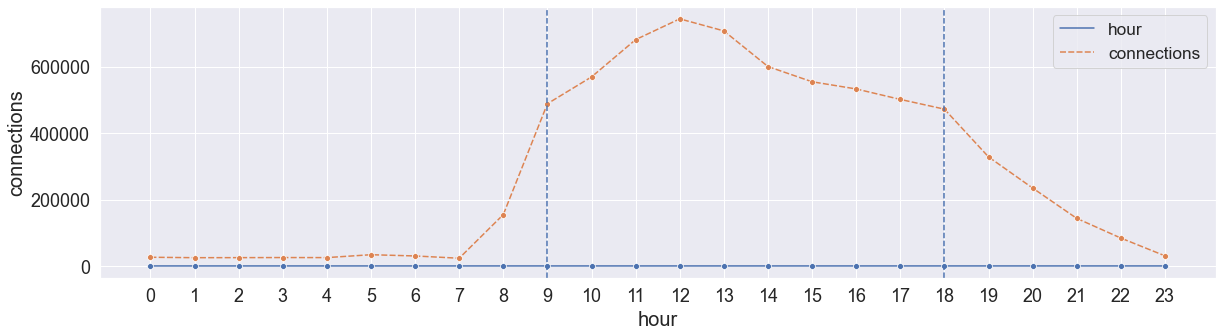

In [107]:
grouped = df.groupby(by=[df.timestamp.dt.hour])
hours = list()
item_len = list()
for hour, item in grouped:
    hours.append(hour)
    item_len.append(len(item))
df_temp = {'hour': hours, 'connections': item_len}

plt.figure()
ax = sns.lineplot(data=df_temp, marker="o")
ax.set(xticks=df_temp['hour'])
ax.axvline(9, 0, 1, linestyle='--')
ax.axvline(18, 0, 1, linestyle='--')
ax.set_xlabel("hour",fontsize=20)
ax.set_ylabel("connections",fontsize=20)
ax.tick_params(labelsize=18)
plt.legend(fontsize='x-large')

del(hours)
del(item_len)
del(grouped)
del(df_temp)

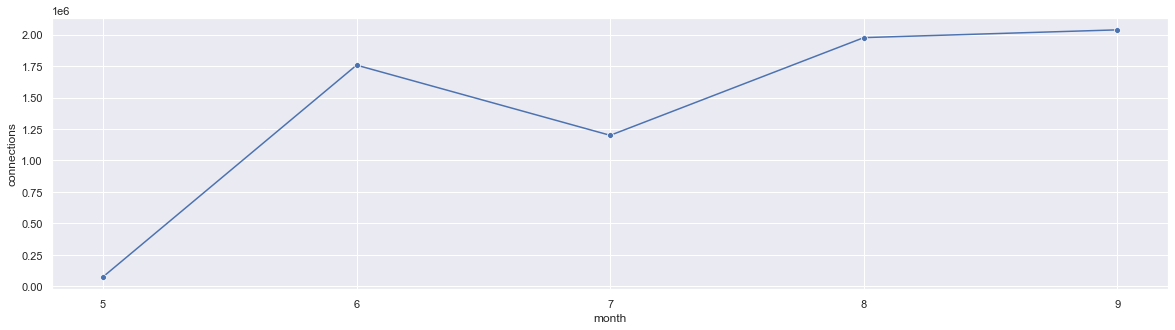

In [108]:
grouped = df.groupby(by=[df.timestamp.dt.month])
months = list()
item_len = list()
for month, item in grouped:
    months.append(month)
    item_len.append(len(item))
df_temp = {'month': months, 'connections': item_len}

plt.figure()
ax = sns.lineplot(data=df_temp, x='month', y='connections', marker="o")
ax.set(xticks=df_temp['month'])

del(months)
del(item_len)
del(grouped)
del(df_temp)

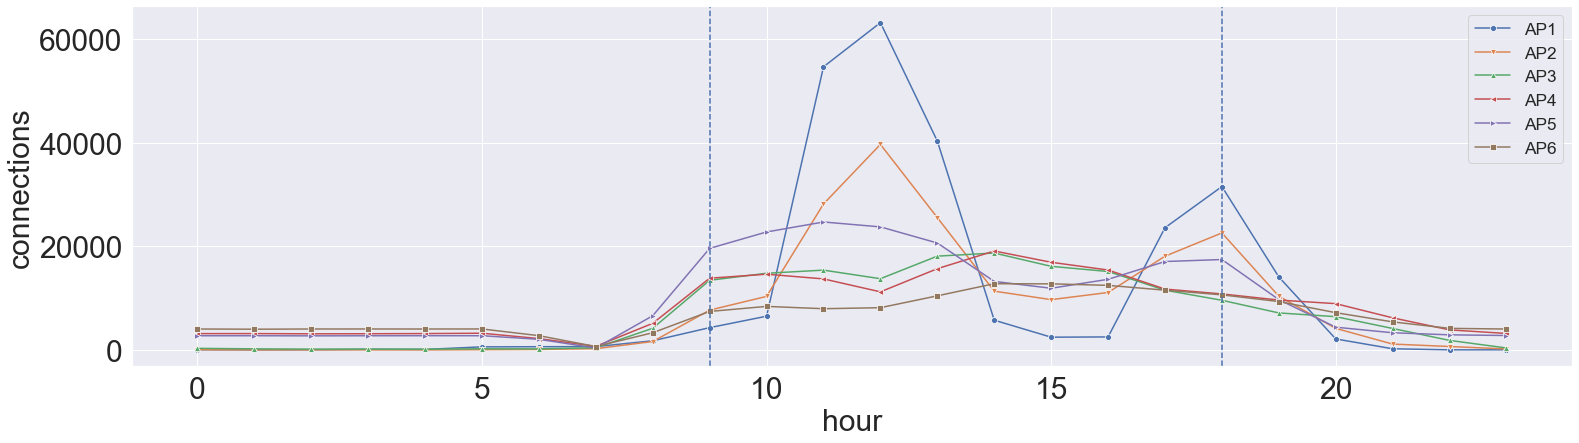

In [109]:
def get_filtered_access_point_connection_per_hour_dataframe(df, access_point):
    filtered = df.loc[df.access_point == access_point]
    grouped = filtered.groupby(by=[filtered.timestamp.dt.hour])
    hours = list()
    item_len = list()
    for hour, item in grouped:
        hours.append(hour)
        item_len.append(len(item))
    return {'hour': hours, 'connections': item_len}


fig = plt.figure()
ax = fig.add_axes([0, 23, 1, 1])
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru_nutricionistas'), x='hour', y='connections', marker="o", label='ru_nutricionistas', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru_nutricionistas'), x='hour', y='connections', marker="o", label='AP1', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'anfiteatro'), x='hour', y='connections', marker="v", label='anfiteatro', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'anfiteatro'), x='hour', y='connections', marker="v", label='AP2', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'iad-1andar'), x='hour', y='connections', marker="^", label='iad-1andar', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'iad-1andar'), x='hour', y='connections', marker="^", label='AP3', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'iad-2andar'), x='hour', y='connections', marker="<", label='iad-2andar', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'iad-2andar'), x='hour', y='connections', marker="<", label='AP4', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ap4600-67afac'), x='hour', y='connections', marker=">", label='ap4600-67afac', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ap4600-67afac'), x='hour', y='connections', marker=">", label='AP5', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'iad-2andarpredionovo'), x='hour', y='connections', marker="s", label='iad-2andarpredionovo', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'iad-2andarpredionovo'), x='hour', y='connections', marker="s", label='AP6', ax=ax)
ax.axvline(9, 0, 1, linestyle='--')
ax.axvline(18, 0, 1, linestyle='--')
ax.set_xlabel("hour",fontsize=30)
ax.set_ylabel("connections",fontsize=30)
ax.tick_params(labelsize=30)
ax.legend()
plt.legend(fontsize='x-large')

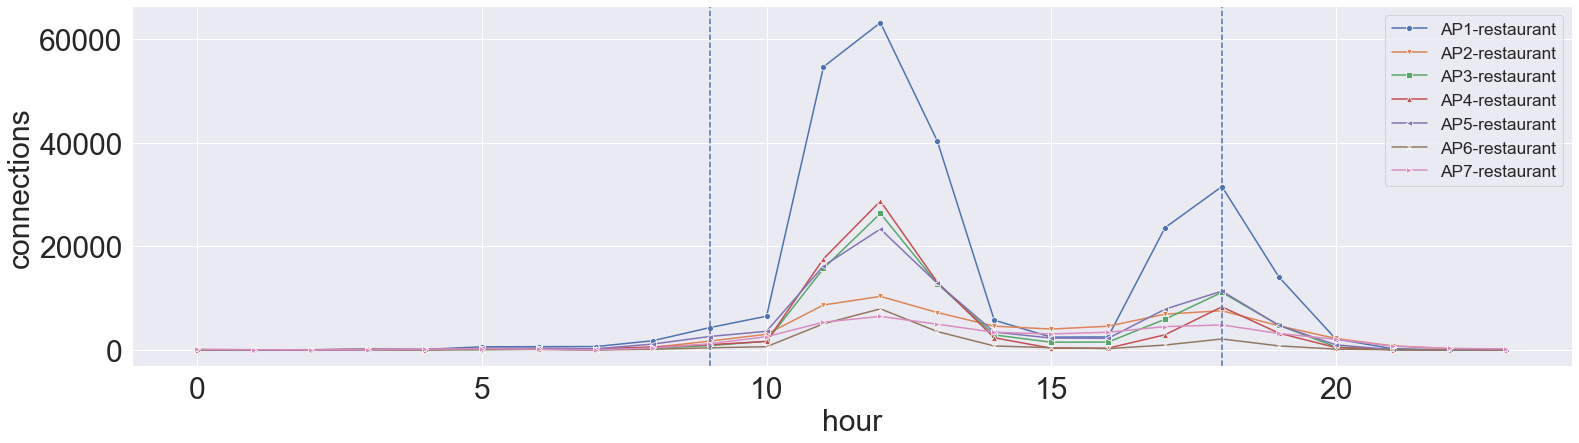

In [110]:
fig = plt.figure()
ax = fig.add_axes([0, 23, 1, 1])
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru_nutricionistas'), x='hour', y='connections', marker="o", label='ru_nutricionistas', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru_nutricionistas'), x='hour', y='connections', marker="o", label='AP1-restaurant', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, '2andarsala4272frenteru'), x='hour', y='connections', marker="v", label='2andarsala4272frenteru', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, '2andarsala4272frenteru'), x='hour', y='connections', marker="v", label='AP2-restaurant', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-pilar-1'), x='hour', y='connections', marker="s", label='ru-pilar-1', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-pilar-1'), x='hour', y='connections', marker="s", label='AP3-restaurant', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-pilar-2'), x='hour', y='connections', marker="^", label='ru-pilar-2', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-pilar-2'), x='hour', y='connections', marker="^", label='AP4-restaurant', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-adm-1'), x='hour', y='connections', marker="<", label='ru-adm-1', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-adm-1'), x='hour', y='connections', marker="<", label='AP5-restaurant', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-adm-2'), x='hour', y='connections', marker="x", label='ru-adm-2', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'ru-adm-2'), x='hour', y='connections', marker="x", label='AP6-restaurant', ax=ax)
# sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'sala4172frenteru'), x='hour', y='connections', marker=">", label='sala4172frenteru', ax=ax)
sns.lineplot(data=get_filtered_access_point_connection_per_hour_dataframe(df, 'sala4172frenteru'), x='hour', y='connections', marker=">", label='AP7-restaurant', ax=ax)
ax.axvline(9, 0, 1, linestyle='--')
ax.axvline(18, 0, 1, linestyle='--')
ax.set_xlabel("hour",fontsize=30)
ax.set_ylabel("connections",fontsize=30)
ax.tick_params(labelsize=30)
ax.legend()
plt.legend(fontsize='x-large')

In [111]:
resturant_access_points = ['ru_nutricionistas', '2andarsala4272frenteru', 'ru-pilar-2', 'ru-adm-1', 'sala4172frenteru', 'ru-pilar-1', 'ru-adm-2']
df = df[df.access_point.isin(resturant_access_points) == True]
print('The new dataset shape is: %d x %d' % (df.shape))

The new dataset shape is: 657208 x 4


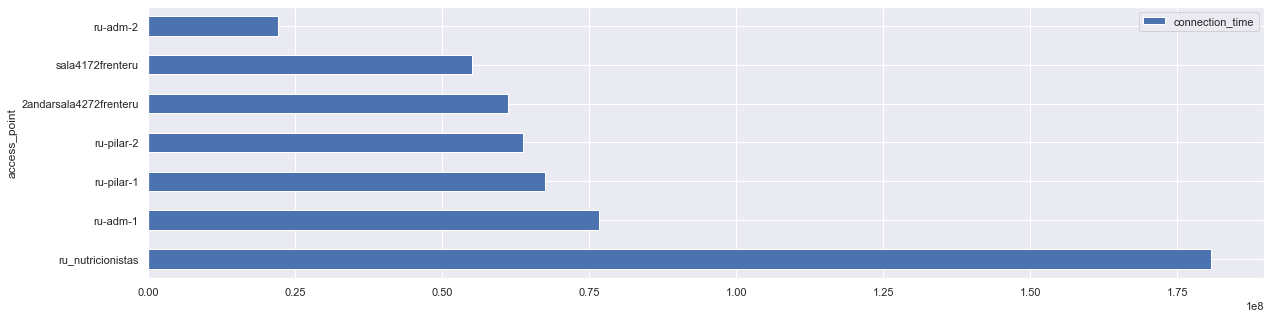

In [112]:
grouped = df.groupby('access_point').sum().sort_values('connection_time', ascending=False)
grouped.drop(columns=['host'], inplace=True)
top = 10
grouped[:top].plot.barh()
del(grouped)

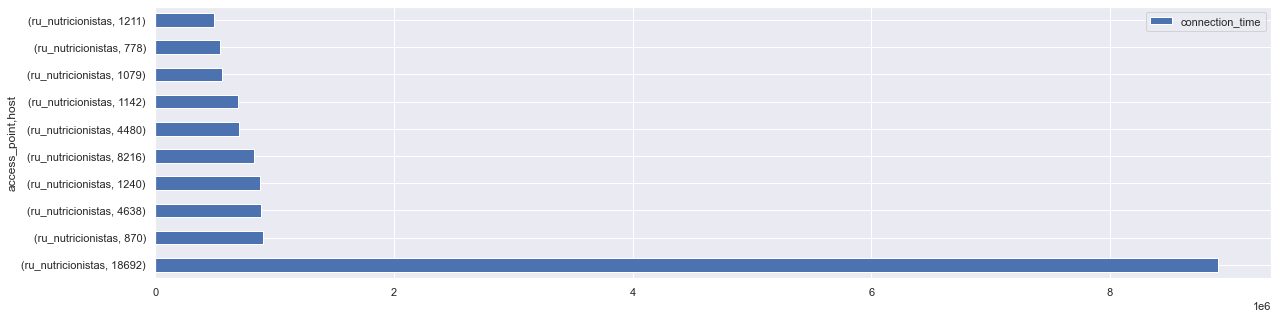

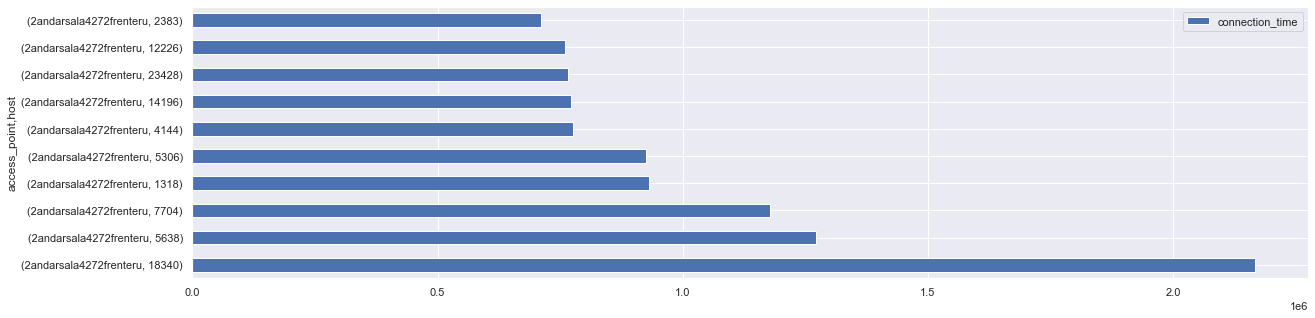

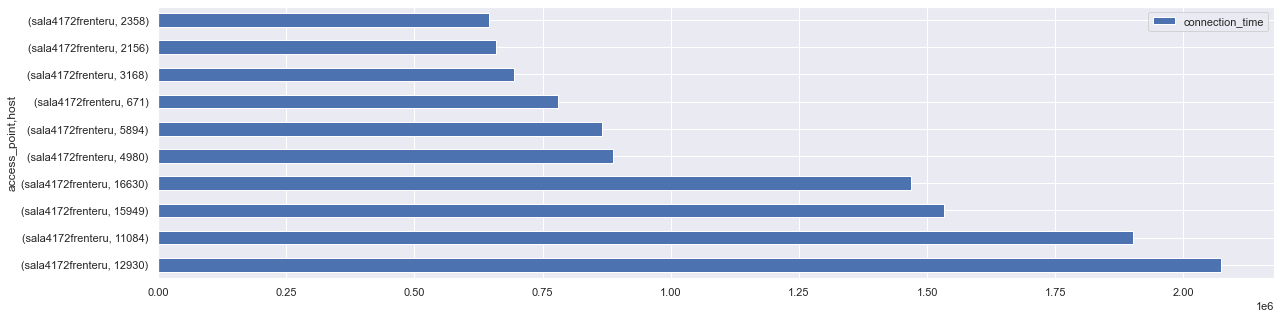

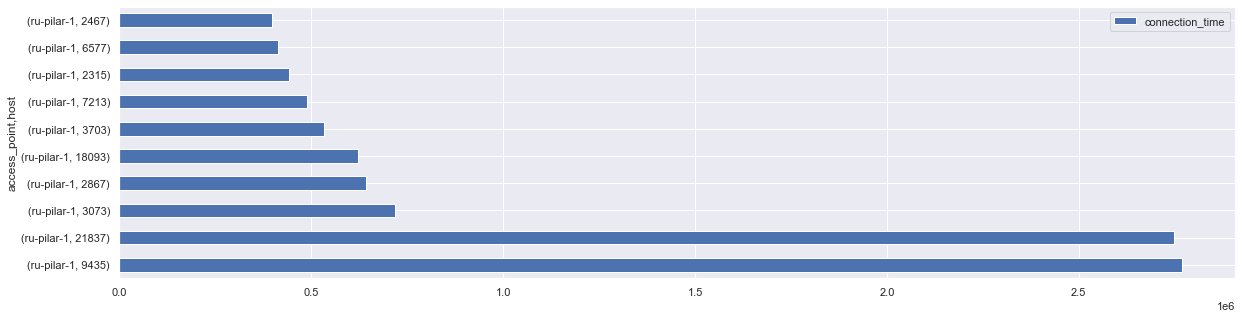

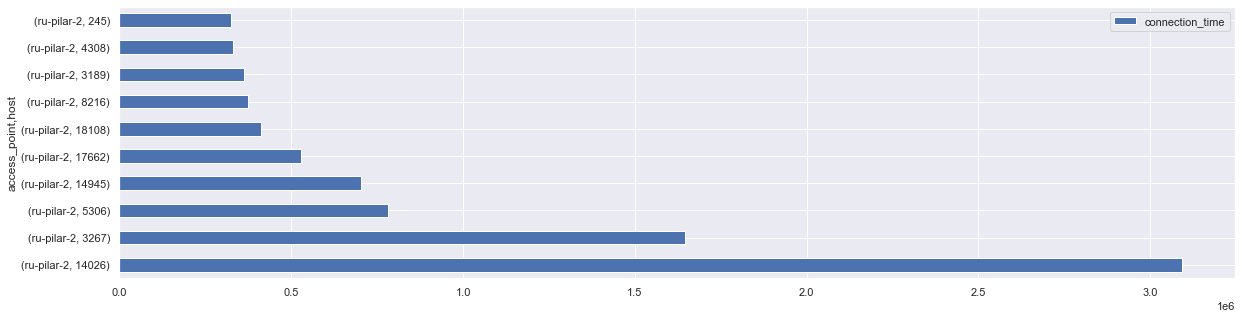

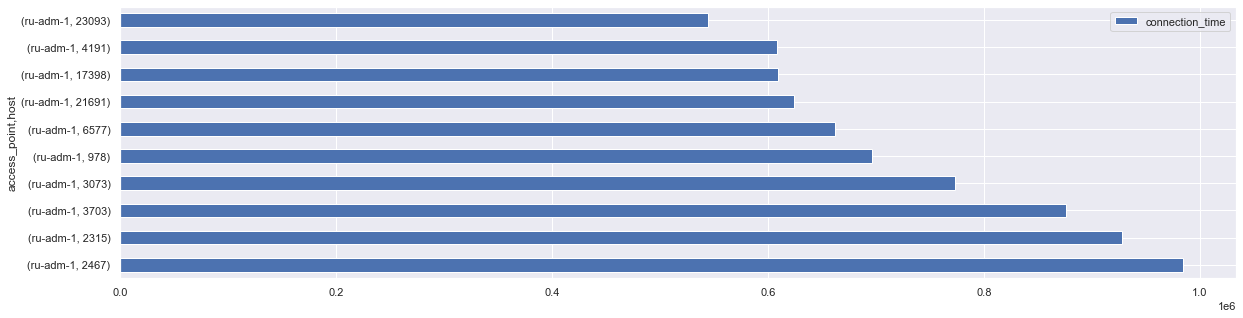

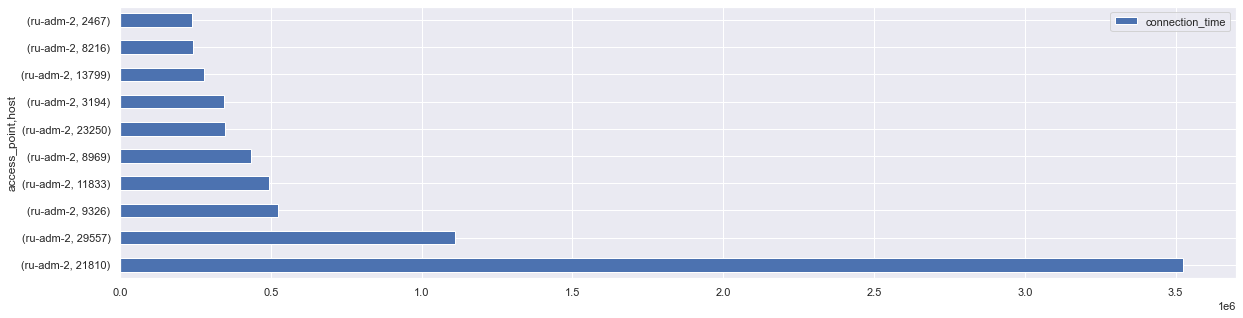

In [113]:
grouped = df.groupby(['access_point', 'host']).sum().sort_values('connection_time', ascending=False)

def get_barh_connection_time_access_point_host(df, label, top=10):
    filtered = grouped[grouped.index.get_level_values(0) == label]
    filtered[:top].plot.barh()

get_barh_connection_time_access_point_host(grouped, 'ru_nutricionistas')
get_barh_connection_time_access_point_host(grouped, '2andarsala4272frenteru')
get_barh_connection_time_access_point_host(grouped, 'sala4172frenteru')
get_barh_connection_time_access_point_host(grouped, 'ru-pilar-1')
get_barh_connection_time_access_point_host(grouped, 'ru-pilar-2')
get_barh_connection_time_access_point_host(grouped, 'ru-adm-1')
get_barh_connection_time_access_point_host(grouped, 'ru-adm-2')
del(grouped)

In [114]:
df.to_csv('ufjf_dataset_cleaned.csv', index=False)  